# **"CUSTOMER CHURN PREDICTION FOR SYRIATEL"**

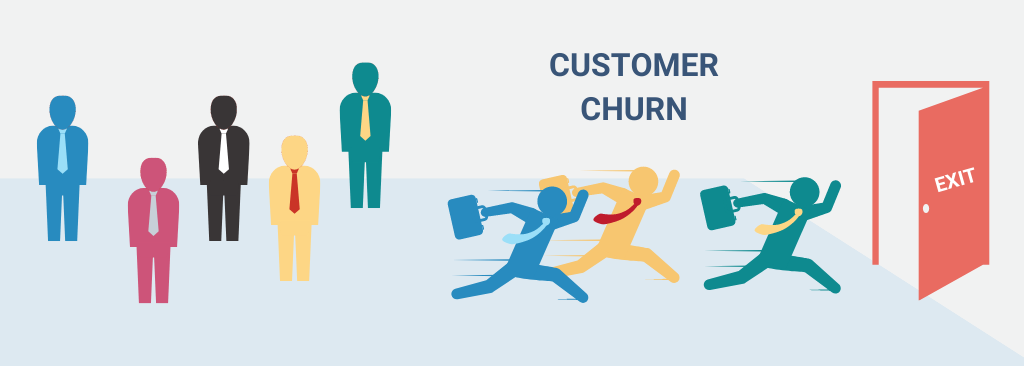

In [73]:
#import library to display image
from IPython.display import Image, display
display(Image(filename='images/customer churn image.png'))

# By : Jane Wanjiku Njuguna
***

# **1.Business Understanding**


## 1.1 Overview

### Problem Statement

#### SyriaTel, a telecommunications company, is facing a challenge with customers switching to competitors, resulting in revenue loss. The company seeks to tackle the issue of revenue loss by creating a model to predict customer churn. By analyzing the customer data, it will help the company gain insights and take action ,ultimately reducing the churn rate and improving business performance.

### Objectives

#### 1. To identify key drivers of churn rate.
#### 2. To develop a predictive model that predicts the likelihood of churning based on features of      the dataset
#### 3. To implement measures to retain customers who are likely to churn.

### Metrics of Success


* #### Developing a model with an reccall score of 0.7
* ####  An accuracy score of 0.8
* #### Analyzing the main features that influence customer churn.
* #### Providing recommendations to the company for reducing churn rate.

#  **2. Data Understanding**

## 2.1 Load the dataset

### The following dataset (SyriaTel telecom dataset) is typically available in online data science and machine learning platform (Kaggle). It is frequently used in projects focused on predicting customer churn and contains anonymized records of customer information.

In [74]:
# import libraries

#Data Analysis
import pandas as pd 
import numpy as np 

# Data visualization
import seaborn as sns 
import matplotlib.pyplot as plt 

#Downloading 
from IPython.display import FileLink
#checks for multicollinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor
# Modeling
from scipy import stats
from sklearn.preprocessing import LabelEncoder, StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report , confusion_matrix,accuracy_score,recall_score,ConfusionMatrixDisplay,roc_curve,roc_auc_score 
from sklearn.tree import DecisionTreeClassifier
from imblearn.over_sampling  import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV, StratifiedKFold,RandomizedSearchCV
from sklearn.compose import ColumnTransformer
from statsmodels.tools.tools import add_constant
from sklearn.pipeline import Pipeline


In [75]:
#loading the data
churn_analysis_df = pd.read_csv('data/churn analysis.csv')


In [76]:
#Checking the top 5 records
churn_analysis_df.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


To understand the dataset better, check its shape to see how many rows and columns it has, check the columns to know what features are included, and check the data types to understand the kind of information each column holds, like numbers or text.

In [5]:
#General Overview of the dataframe
churn_analysis_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account length          3333 non-null   int64  
 2   area code               3333 non-null   int64  
 3   phone number            3333 non-null   object 
 4   international plan      3333 non-null   object 
 5   voice mail plan         3333 non-null   object 
 6   number vmail messages   3333 non-null   int64  
 7   total day minutes       3333 non-null   float64
 8   total day calls         3333 non-null   int64  
 9   total day charge        3333 non-null   float64
 10  total eve minutes       3333 non-null   float64
 11  total eve calls         3333 non-null   int64  
 12  total eve charge        3333 non-null   float64
 13  total night minutes     3333 non-null   float64
 14  total night calls       3333 non-null   

# Categorical Features:

**state:** The state where the customer lives.

**phone number:** The customer's phone number.

**international plan:** Does the customer have an international plan?(Yes or No).

**voice mail plan:** Whether the customer has a voice mail plan (Yes or No).

# Numeric Features:

**area code:** The area code associated with the customer's phone number.

**account length:** The number of days the customer has been an account holder.

**number vmail messages:** The number of voice mail messages received by the customer.

**total day minutes:** The total number of minutes the customer used during the day.

**total day calls:** The total number of calls made by the customer during the day.

**total day charge:** The total charges paid by the customer for daytime usage.

**total eve minutes:** The total number of minutes the customer used during the evening.

**total eve calls:** The total number of calls made by the customer during the evening.

**total eve charge:** The total charges paid by the customer for evening usage.

**total night minutes:** The total number of minutes the customer used during the night.

**total night calls:** The total number of calls made by the customer during the night.

**total night charge:** The total charges paid by the customer for nighttime usage.

**total intl minutes:** The total number of international minutes used by the customer.

**total intl calls:** The total number of international calls made by the customer.

**total intl charge:** The total charges incurred by the customer for international usage.

**customer service calls:** The number of customer service calls made by the customer.

In [77]:
#shape of the dataframe
shape = churn_analysis_df.shape
print(f'The dataframe has {shape[0]} rows.')
print(f'The dataframe has {shape[1]} columns.')


The dataframe has 3333 rows.
The dataframe has 21 columns.


In [78]:
#summary statistic of numerical columns
churn_analysis_df.describe()

,account length,area code,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,437.182418,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856
std,39.822106,42.371290,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491
min,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,408.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000
50%,101.000000,415.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,510.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000
max,243.000000,510.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


### Insight

**1.Customer Tenure:** Customers stay with the company for an average of 101 months which is indicated by the account length column, but some are very new, and others have been around.

**2.Day_time Calls :** On average, customers spend 179 minutes on daytime calls.

**3.Evening Calls:** People tend to make more calls in the evening, averaging 201 minutes more than the daytime calls.

**4.International Calls:** Very few customers make international calls, and those who do, keep it brief, averaging just 10 minutes.

# 3. DATA PREPARATION

## 3.1 Data Cleaning

In [79]:
#Dropping irrelevant columns
#Dropping the 'phone number' column
churn_analysis_df= churn_analysis_df.drop("phone number", axis=1)

Dropping the phone number column from the dataset is appropriate because a person's phone number does not influence whether they churn or not.

* ## Checking for Missing Values

In [80]:
# missing values
def check_duplicates_and_missing_values(df):
    #checking for missing values
    missing_values = churn_analysis_df.isnull().sum() 
    missing_percentage = (missing_values/ len(df))* 100
    missing_info = pd.DataFrame({'Missing Values': missing_values, 'Percentage': missing_percentage})
    #checking for duplicates
    duplicated_rows = df.duplicated()
    if duplicated_rows.any():
        print('Duplicates found: {}', duplicated_rows)
    else:
        print('No duplicates')

    #return missing values info and duplicate count
    return missing_info , duplicated_rows
    
    

check_duplicates_and_missing_values(churn_analysis_df)

No duplicates


(                        Missing Values  Percentage
 state                                0         0.0
 account length                       0         0.0
 area code                            0         0.0
 international plan                   0         0.0
 voice mail plan                      0         0.0
 number vmail messages                0         0.0
 total day minutes                    0         0.0
 total day calls                      0         0.0
 total day charge                     0         0.0
 total eve minutes                    0         0.0
 total eve calls                      0         0.0
 total eve charge                     0         0.0
 total night minutes                  0         0.0
 total night calls                    0         0.0
 total night charge                   0         0.0
 total intl minutes                   0         0.0
 total intl calls                     0         0.0
 total intl charge                    0         0.0
 customer se

In [10]:
#copy of the original dataframe
churn_analysis_df2 = churn_analysis_df.copy()

In [81]:
# Define bins  and labels
bins = [0,60, 120, 180, 240]  
labels = ['0–2 months', '2–4 months', '4–6 months','6–8 months']

# Bin the account length
churn_analysis_df2['account_length_bins'] = pd.cut(churn_analysis_df['account length'], bins=bins, labels=labels, right=False)

churn_analysis_df2

,state,account length,area code,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,...,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn,account_length_bins,total_charges
0,Kansas,128,415,no,yes,25,265.1,110,45.07,197.4,...,244.7,91,11.01,10.0,3,2.70,1,False,4–6 months,75.56
1,Ohio,107,415,no,yes,26,161.6,123,27.47,195.5,...,254.4,103,11.45,13.7,3,3.70,1,False,2–4 months,59.24
2,New Jersey,137,415,no,no,0,243.4,114,41.38,121.2,...,162.6,104,7.32,12.2,5,3.29,0,False,4–6 months,62.29
3,Ohio,84,408,yes,no,0,299.4,71,50.90,61.9,...,196.9,89,8.86,6.6,7,1.78,2,False,2–4 months,66.80
4,Oklahoma,75,415,yes,no,0,166.7,113,28.34,148.3,...,186.9,121,8.41,10.1,3,2.73,3,False,2–4 months,52.09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,Arizona,192,415,no,yes,36,156.2,77,26.55,215.5,...,279.1,83,12.56,9.9,6,2.67,2,False,6–8 months,60.10
3329,West Virginia,68,415,no,no,0,231.1,57,39.29,153.4,...,191.3,123,8.61,9.6,4,2.59,3,False,2–4 months,63.53
3330,Rhode Island,28,510,no,no,0,180.8,109,30.74,288.8,...,191.9,91,8.64,14.1,6,3.81,2,False,0–2 months,67.74
3331,Connecticut,184,510,yes,no,0,213.8,105,36.35,159.6,...,139.2,137,6.26,5.0,10,1.35,2,False,6–8 months,57.53


In [82]:
#Rechecking the account length bins column
churn_analysis_df2['account_length_bins'].value_counts()

account_length_bins
2–4 months    1766
4–6 months     980
0–2 months     494
6–8 months      92
Name: count, dtype: int64

In [83]:
# Mapping of state abbreviations to full state names
state_in_full = {
    'WV': 'West Virginia',
    'MN': 'Minnesota',
    'NY': 'New York',
    'AL': 'Alabama',
    'WI': 'Wisconsin',
    'OH': 'Ohio',
    'OR': 'Oregon',
    'WY': 'Wyoming',
    'VA': 'Virginia',
    'CT': 'Connecticut',
    'MI': 'Michigan',
    'ID': 'Idaho',
    'VT': 'Vermont',
    'TX': 'Texas',
    'UT': 'Utah',
    'IN': 'Indiana',
    'MD': 'Maryland',
    'KS': 'Kansas',
    'NC': 'North Carolina',
    'NJ': 'New Jersey',
    'MT': 'Montana',
    'CO': 'Colorado',
    'NV': 'Nevada',
    'WA': 'Washington',
    'RI': 'Rhode Island',
    'MA': 'Massachusetts',
    'MS': 'Mississippi',
    'AZ': 'Arizona',
    'FL': 'Florida',
    'MO': 'Missouri',
    'NM': 'New Mexico',
    'ME': 'Maine',
    'ND': 'North Dakota',
    'NE': 'Nebraska',
    'OK': 'Oklahoma',
    'DE': 'Delaware',
    'SC': 'South Carolina',
    'SD': 'South Dakota',
    'KY': 'Kentucky',
    'IL': 'Illinois',
    'NH': 'New Hampshire',
    'AR': 'Arkansas',
    'GA': 'Georgia',
    'DC': 'District of Columbia',
    'HI': 'Hawaii',
    'TN': 'Tennessee',
    'AK': 'Alaska',
    'LA': 'Louisiana',
    'PA': 'Pennsylvania',
    'IA': 'Iowa',
    'CA': 'California'
}

# state abbreviations with full names in the dataset
churn_analysis_df2['state'] = churn_analysis_df2['state'].replace(state_in_full)

# Checking for the changes
print(churn_analysis_df2[['state']].head())

        state
0      Kansas
1        Ohio
2  New Jersey
3        Ohio
4    Oklahoma


# 4. Data Analysis

## 4.1 Univariate Analysis


### Previewing the target variable column of whether it is imbalanced or not which is our class column whether a customer churns or not.

#### Visualizing data imbalance of the target variable


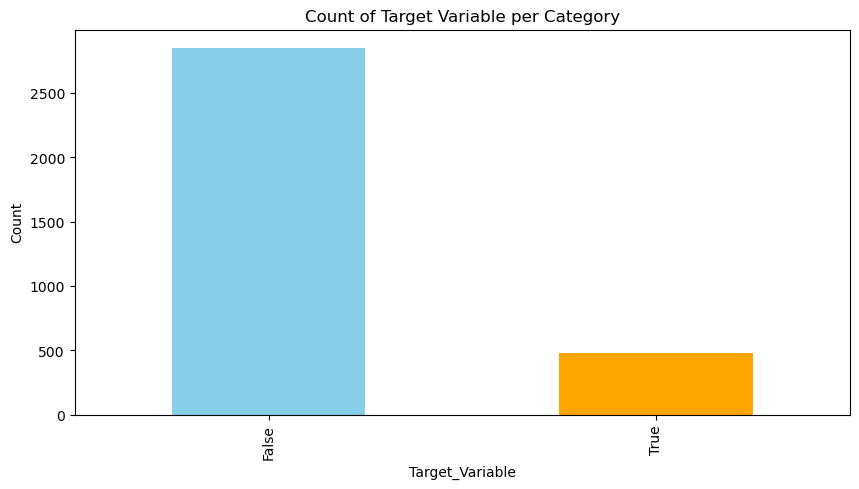

In [84]:
#plot value_counts for the churn column
churn_counts = churn_analysis_df2['churn'].value_counts() 
churn_counts.plot(kind = 'bar' , figsize = (10,5), color = ['skyblue' , 'orange'])
#Add plot labels and title
plt.xlabel('Target_Variable')
plt.ylabel('Count')
plt.title('Count of Target Variable per Category')
plt.savefig('target_imbalance.png',dpi=300, bbox_inches='tight')
#show the plot
plt.show();
                                      

In [85]:

FileLink('images/target_imbalance.png')

C:\Users\hp\Documents\PHASE3\PHASE3PROJECT\images\target_imbalance.png

##  Check the target variable if its balanced or imbalanced.

In [16]:
print('Raw counts : \n')
#print the value_counts for the churn column
print(churn_analysis_df2['churn'].value_counts())
print('..........................')
#print the proportion of each category in the churn column
print(churn_analysis_df2['churn'].value_counts(normalize = True))

Raw counts : 

churn
False    2850
True      483
Name: count, dtype: int64
..........................
churn
False    0.855086
True     0.144914
Name: proportion, dtype: float64


**Insight**
 * The data is highly imbalanced
 * Most customers stay with the company (85.5%), while only a small group (14.5%) leave. This difference means we need to ensure the model can still focus on predicting those who leave.

### 2. Distribution of categorical features

In [86]:
#distribution of categorical features
def categorical_features(data, feature, save_as):
    
    #Ploting the distribution of a categorical feature in the given data.
    
    plt.figure(figsize=(10, 5))
    sns.countplot(x=feature, data=data, color='pink', order=data[feature].value_counts().index)
    plt.xticks(rotation=90)
    plt.title(f"Distribution of {feature}", fontsize=16)#Adds title
    plt.savefig(save_as, dpi=300, bbox_inches='tight')
    plt.show()
    

In [87]:
#count of the customers
def count_customers_with_feature(data, feature_column, feature_value):
   return data[data[feature_column] == feature_value].shape[0]

* 1. International Plan

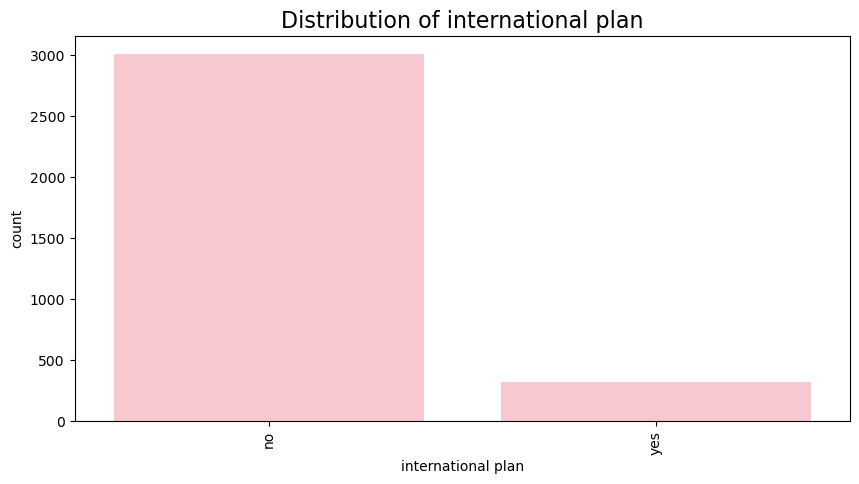

In [88]:
categorical_features(churn_analysis_df2, 'international plan', save_as = 'international_plan.png')

In [89]:
FileLink('images/international_plan.png')

C:\Users\hp\Documents\PHASE3\PHASE3PROJECT\images\international_plan.png

In [90]:
# Count customers with international plan
international_plan_count = count_customers_with_feature(churn_analysis_df2, 'international plan', 'yes')
international_plan_count

323

* Insight
  
323 customers out of 3333 customers have an international plan.

* 2. Voice mail plan

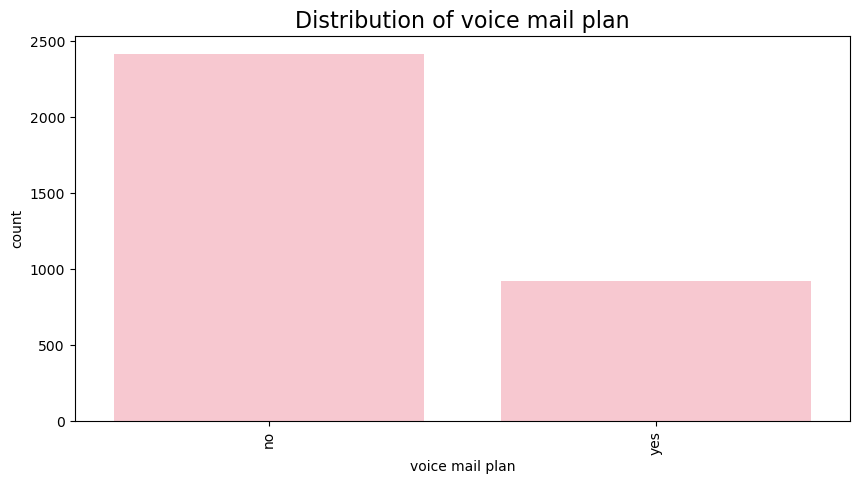

In [91]:
categorical_features(churn_analysis_df2, 'voice mail plan',save_as = 'voice_mail_plan.png')

In [92]:
voicemail_plan_count = count_customers_with_feature(churn_analysis_df2, 'voice mail plan', 'yes')
voicemail_plan_count

922

* Insight

Only 922 customers have a voice mail plan out of 3333 customers

In [93]:
FileLink('images/voice_mail_plan.png')

C:\Users\hp\Documents\PHASE3\PHASE3PROJECT\images\voice_mail_plan.png

* State

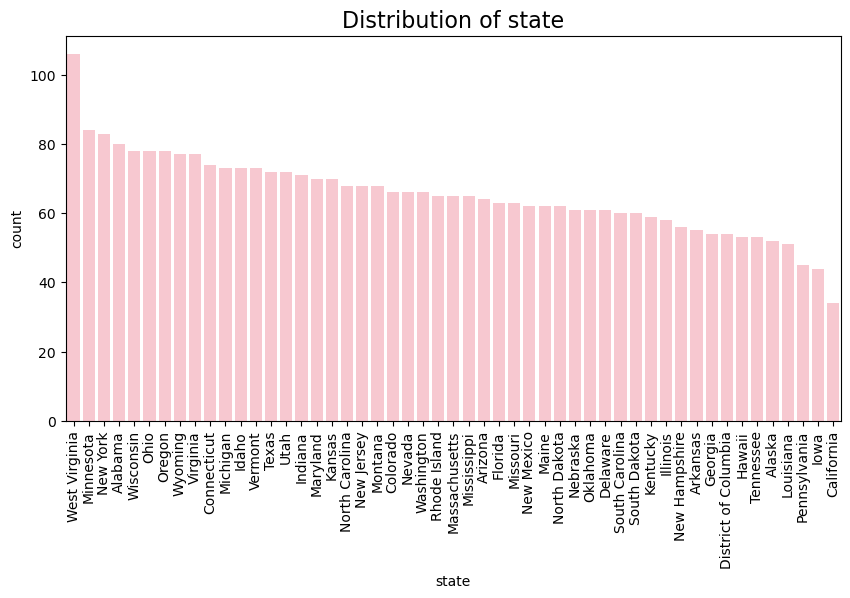

In [94]:
categorical_features(churn_analysis_df2, 'state', save_as = 'state.png')

In [95]:
FileLink('images/state.png')

C:\Users\hp\Documents\PHASE3\PHASE3PROJECT\images\state.png

* Insight

Most of the customers are from West Virginia,Minnesota,NewYork,Alabama and Wisconsin.

## 4.2 Bivariate Analysis

###  "Let’s analyze how the target values interact with other features in the dataset to uncover useful patterns and insights.

####  Relationship between categorical variables(voice mail plan,international plan and state) and the churn rate

In [96]:
#Checking the distribution of categorical features based on churn rate
def plot_categorical_distribution_on_churn_rate(df, feature, save_as):

   # Plots the distribution of a categorical feature in the given data.
    
    plt.figure(figsize=(10, 4))
    churn_counts = df.groupby(feature)["churn"].sum().sort_values(ascending=False)
    top_10_categories = churn_counts.head(10).index.tolist()
    sns.countplot(x=feature, hue="churn", data=df, order=top_10_categories ,palette= ["#66CDAA", "#4682B4"])
    plt.xticks(rotation=90)
    plt.legend(loc="upper right")
    plt.title(f"Distribution of '{feature}' Based on Churn Rate", fontsize=16) #adds title
    plt.savefig(save_as, dpi=300, bbox_inches='tight')
    plt.show()

#####  a. Area Code

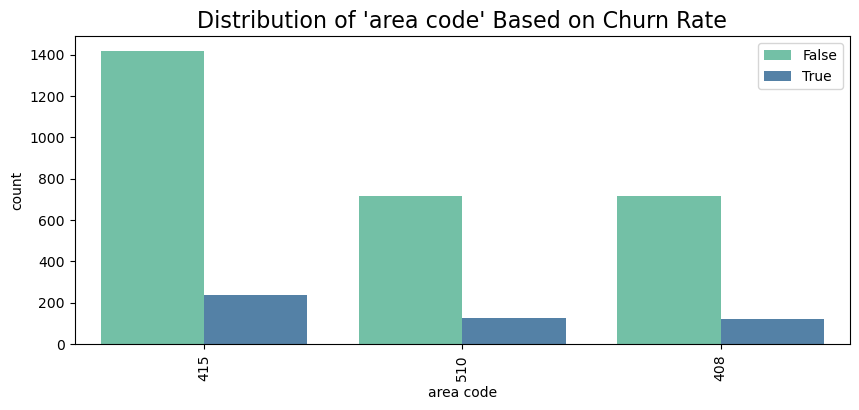

In [97]:
plot_categorical_distribution_on_churn_rate(churn_analysis_df2, 'area code', save_as = 'area_code.png')

In [98]:
FileLink('images/area_code.png')

C:\Users\hp\Documents\PHASE3\PHASE3PROJECT\images\area_code.png

**Insight**

* Of the customers who have terminated their account, most of them are from area codes 415 and 510

##### b. International plan

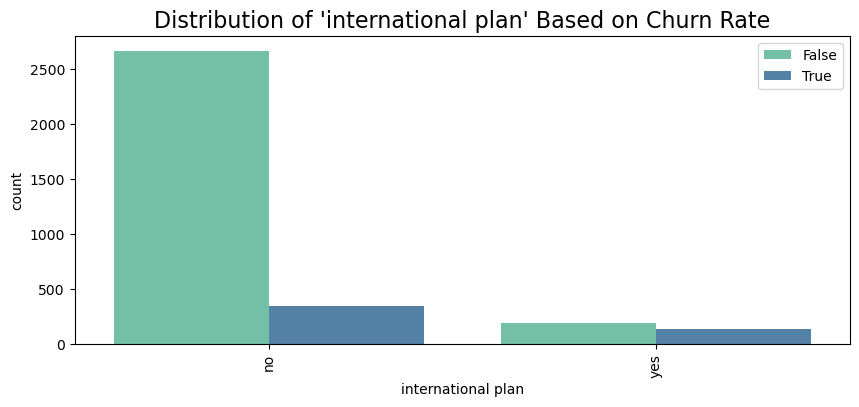

In [99]:
plot_categorical_distribution_on_churn_rate(churn_analysis_df2, 'international plan', save_as = 'international_on_churn.png')


In [100]:
FileLink('images/international_on_churn.png')

C:\Users\hp\Documents\PHASE3\PHASE3PROJECT\images\international_on_churn.png

**Insight** 

* Customers with an international plan are less likely to churn.

In [101]:
 #filter customers with international plan
df_international_plan = churn_analysis_df2[churn_analysis_df2["international plan"] == "yes"]

# ratio of churned vs non-churned customers
churn_counts = df_international_plan["churn"].value_counts(normalize=True)  # Normalize gives proportions
churn_ratios = churn_counts.reset_index()
churn_ratios.columns = ["churn", "ratio"]
churn_ratios

,churn,ratio
0,False,0.575851
1,True,0.424149


 ##### b. Voice mail plan

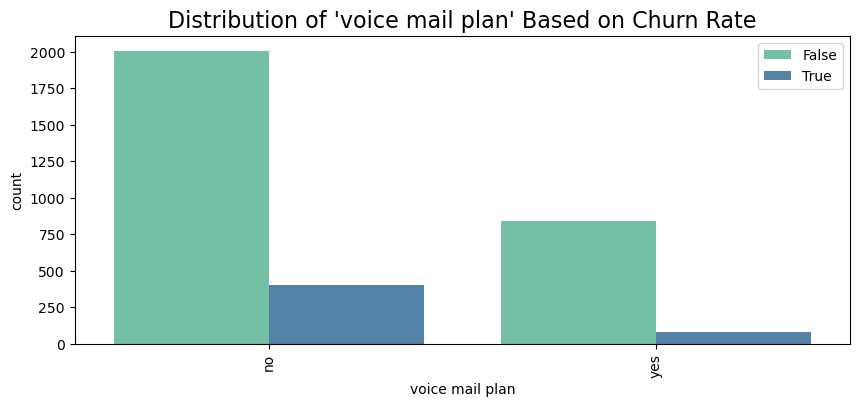

In [102]:
plot_categorical_distribution_on_churn_rate(churn_analysis_df2, 'voice mail plan', save_as = 'voice_mail_churn.png')

* Insight

Most of the customers who churned didnt have a voice mail plan

##### c. State

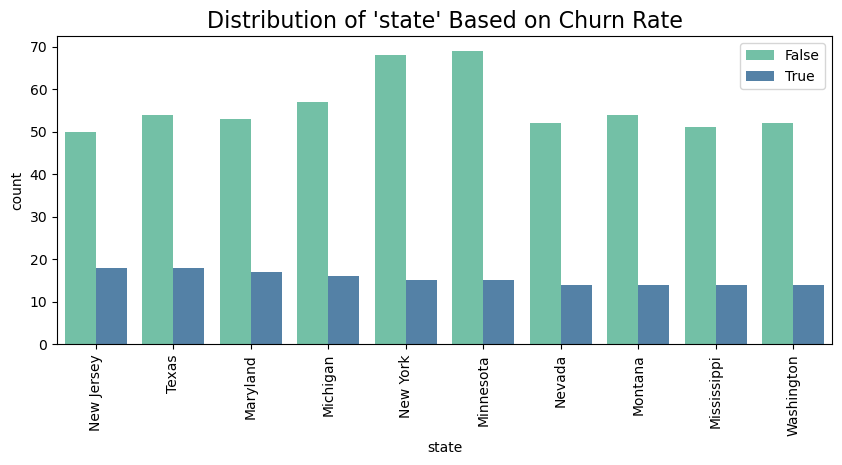

In [103]:
 plot_categorical_distribution_on_churn_rate(churn_analysis_df2, 'state', save_as = 'state_churn.png')

In [104]:
FileLink('images/state_churn.png')

C:\Users\hp\Documents\PHASE3\PHASE3PROJECT\images\state_churn.png

**Insight**
 * Most of the customers who churned were from New Jersey,Texas,Maryland and Michigan.

#####  d. Account_length_bins 

C:\Users\hp\AppData\Local\Temp\ipykernel_17008\702272839.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  churn_counts = df.groupby(feature)["churn"].sum().sort_values(ascending=False)


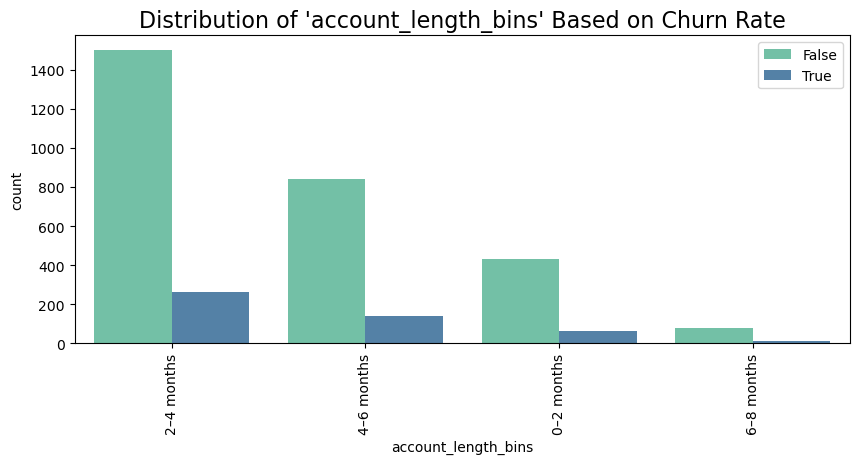

In [36]:
plot_categorical_distribution_on_churn_rate(churn_analysis_df2, "account_length_bins", save_as = 'account_length_bins.png')

In [105]:
FileLink('images/account_length_bins.png')

C:\Users\hp\Documents\PHASE3\PHASE3PROJECT\images\account_length_bins.png

**Insight**

* The number of customers churning decreases as theaccount length (in months) increases suggests that customer loyalty strengthens over time. However, also for the first few months customers can also churn.This implies that customers who stay with the company for longer periods are less likely to churn.

#### Relationship between numerical features and the churn rate

##### a. Total charges 

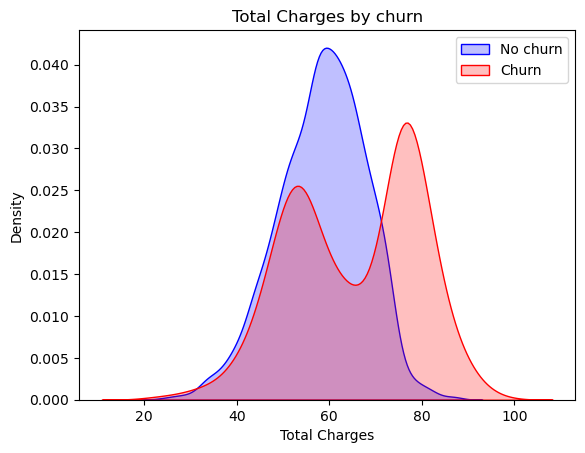

In [106]:
churn_analysis_df2['total_charges'] = (
    churn_analysis_df2['total day charge'] + 
    churn_analysis_df2['total eve charge'] + 
    churn_analysis_df2['total night charge'] + 
    churn_analysis_df2['total intl charge']
)
Total = sns.kdeplot(churn_analysis_df2.total_charges[(churn_analysis_df2['churn'] == False)],
                    color = 'blue' , fill = True)
Total = sns.kdeplot(churn_analysis_df2.total_charges[(churn_analysis_df2['churn'] == True)],
                    color = 'red' , fill = True)
Total.legend(['No churn', 'Churn'],loc = 'upper right')
Total.set_ylabel('Density')
Total.set_xlabel('Total Charges')
Total.set_title('Total Charges by churn')
plt.savefig('total_charges_churn_rate.png', dpi=300, bbox_inches='tight') 
plt.show();

In [107]:


FileLink('images/total_charges_churn_rate.png')  

C:\Users\hp\Documents\PHASE3\PHASE3PROJECT\images\total_charges_churn_rate.png

 **Insight**

* This suggests that customers who stay with the company tend to have moderate total charges compared to those who churned.
 
*  Customers who churn tend to have higher total charges. This might indicate that higher charges could be correlated with dissatisfaction or the likelihood of leaving.

##### b. Customer service calls

In [108]:
def visualize_churn_relationship(data, feature, title, ylabel, save_as):
    #visualize the churn relationshikp
    plt.figure(figsize=(10, 6))
    sns.barplot(x='churn', y=feature, data=data, estimator=np.mean, palette='coolwarm', legend = False,hue = 'churn')
    plt.title(title)
    plt.xlabel('Churn')
    plt.ylabel(ylabel)
    plt.savefig(save_as, dpi=300, bbox_inches='tight')
    plt.show()

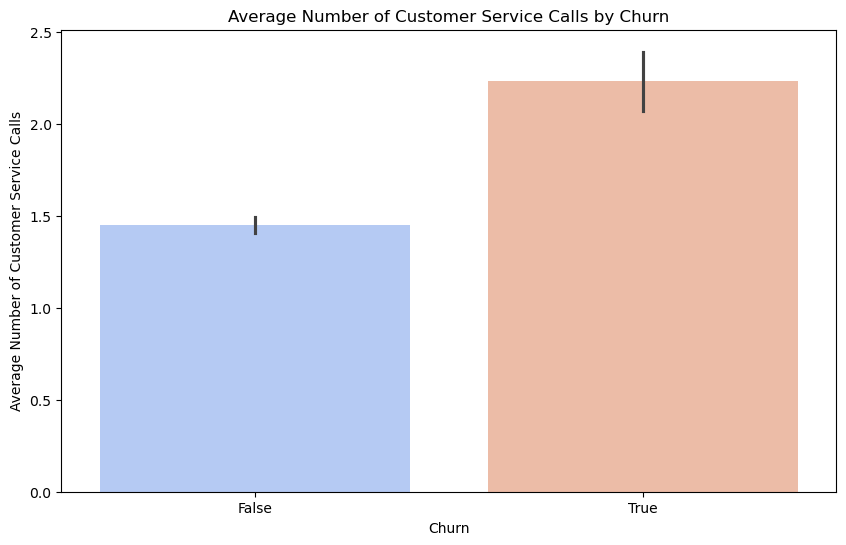

In [109]:
visualize_churn_relationship(
    data=churn_analysis_df2,
    feature='customer service calls',
    title='Average Number of Customer Service Calls by Churn',
    ylabel='Average Number of Customer Service Calls',
    save_as='customer_service_call.png'
)

In [110]:
FileLink('images/customer_service_call.png')

C:\Users\hp\Documents\PHASE3\PHASE3PROJECT\images\customer_service_call.png

**Insight:**

* On average, customers who churned tend to make more customer service calls, which could suggest that they experienced issues that led to them leaving the service. This could be important for retention strategies, as addressing customer concerns may reduce churn.


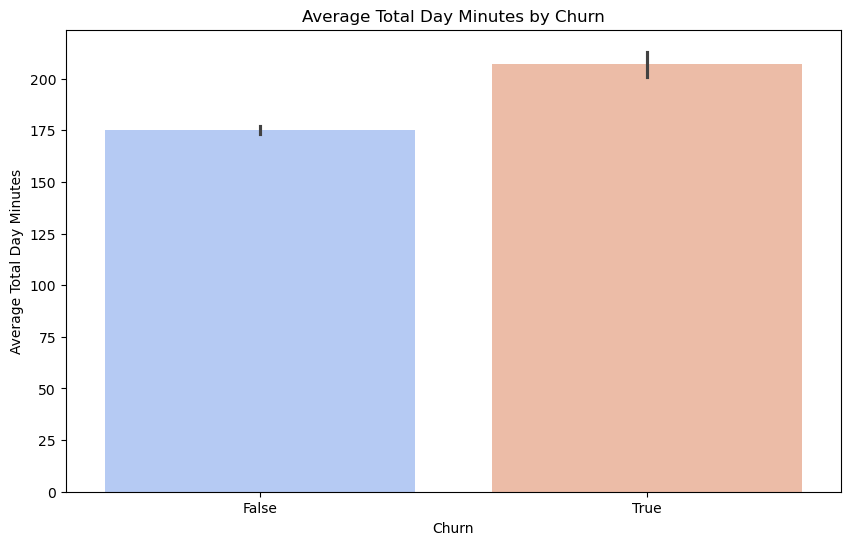

In [111]:
visualize_churn_relationship(
    data=churn_analysis_df2,
    feature='total day minutes',
    title='Average Total Day Minutes by Churn',
    ylabel='Average Total Day Minutes',
    save_as='day_minutes_churn.png'
)

In [112]:
FileLink('images/day_minutes_churn.png')

C:\Users\hp\Documents\PHASE3\PHASE3PROJECT\images\day_minutes_churn.png

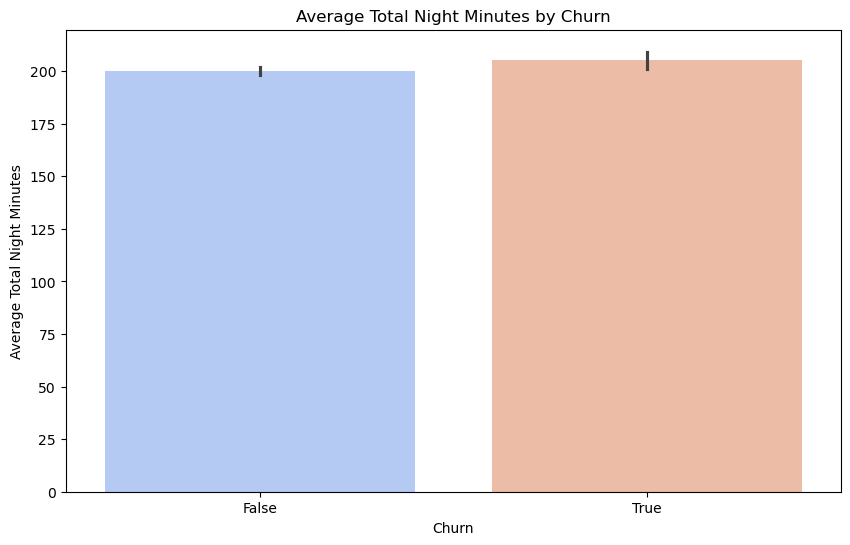

In [45]:
visualize_churn_relationship(
    data=churn_analysis_df2,
    feature='total night minutes',
    title='Average Total Night Minutes by Churn',
    ylabel='Average Total Night Minutes',
    save_as='night_minutes_churn.png'
)

In [113]:
FileLink('images/night_minutes_churn.png')

C:\Users\hp\Documents\PHASE3\PHASE3PROJECT\images\night_minutes_churn.png

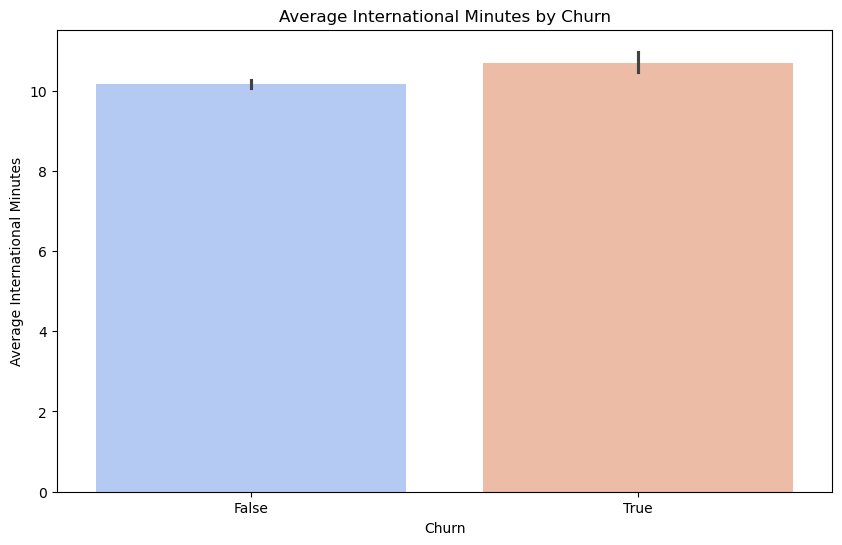

In [114]:
visualize_churn_relationship(
    data=churn_analysis_df2,
    feature='total intl minutes',
    title='Average International Minutes by Churn',
    ylabel='Average International Minutes',
    save_as='intl_minutes_churn.png'
)

In [115]:
FileLink('images/intl_minutes_churn.png')

C:\Users\hp\Documents\PHASE3\PHASE3PROJECT\images\intl_minutes_churn.png

**Combined Insights for the three types of minutes**
* Day Minutes appear to be the most informative among the three features for churn prediction, assuming it shows a meaningful difference between churned and non-churned customers.
* International and Night Minutes may have lower predictive power for churn. 

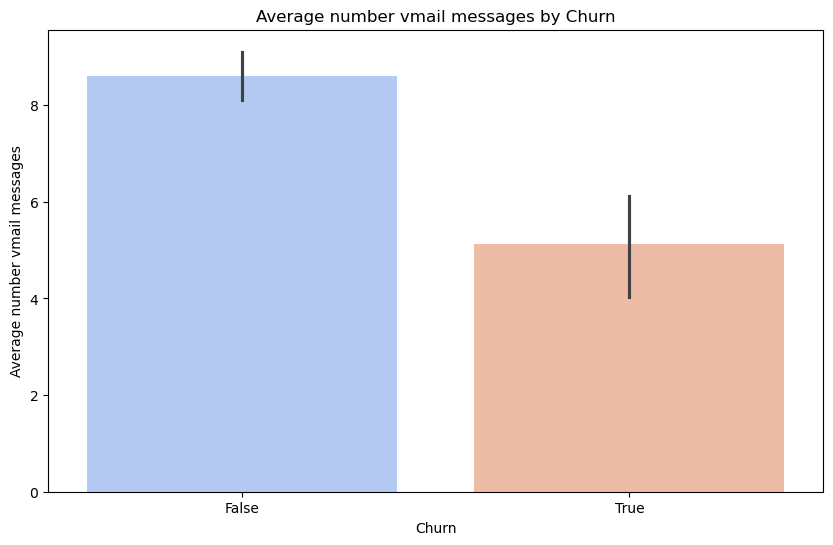

In [116]:
visualize_churn_relationship(
    data=churn_analysis_df2,
    feature='number vmail messages',
    title='Average number vmail messages by Churn',
    ylabel='Average number vmail messages',
    save_as='number_of_voicemail.png'
)

In [117]:
FileLink('images/number_of_voicemail.png')

C:\Users\hp\Documents\PHASE3\PHASE3PROJECT\images\number_of_voicemail.png

**Insight**

* The customers who are likely to churn receive low number of voice mail. Since the number of voice mail messages is directly related to voice mail plan that is you can't receive a voicemail message if you dont have a voicemail plan.Further analysis will be required.

## Multivariate Analysis

### Analyze the relationships between multiple variables in the dataset to understand how they interact and influence the target variable (Churn). This includes identifying potential correlations, dependencies, and trends among features.

* **State**

**Insight**
  
* As seen from earlier,most of the customers who churned are from New York, Texas, Maryland,Michigan
* What could be influencing this states lets try and compare with their total day charges?

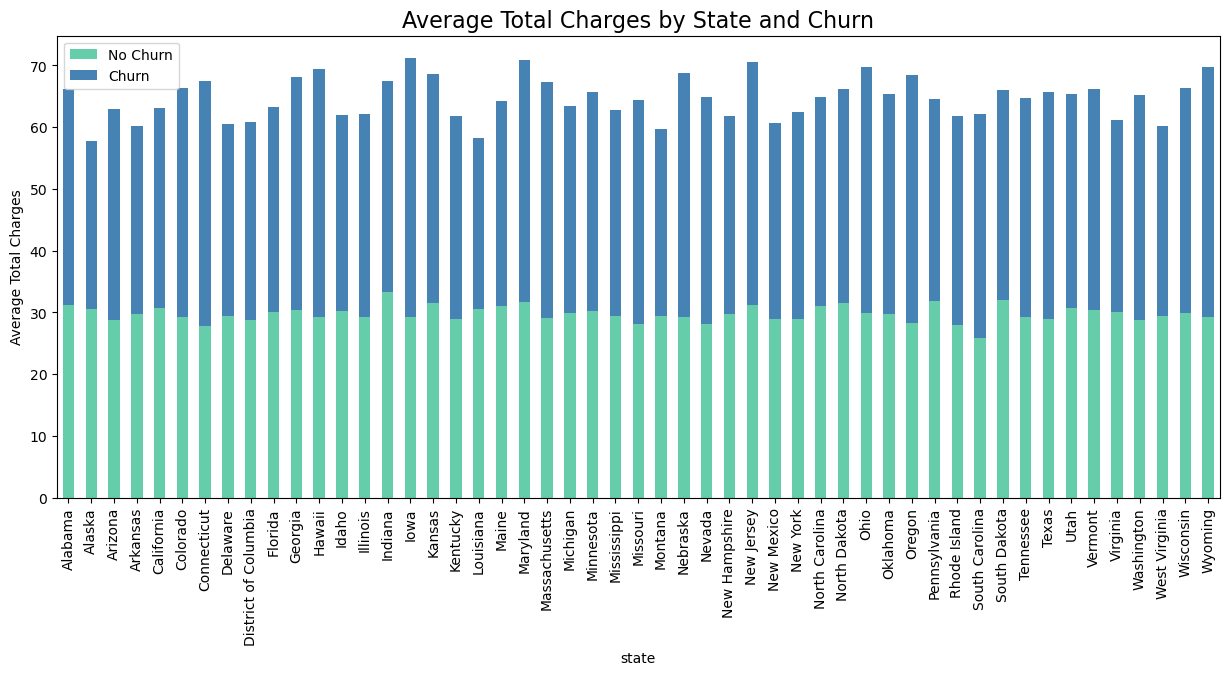

In [119]:
# Group by state and churn, and calculate the mean of 'total charges'
state_churn_charges = churn_analysis_df2.groupby(['state', 'churn'])['total day charge'].mean().unstack()
    
    # Plot the distribution of total charges by state and churn
state_churn_charges.plot(kind='bar', stacked=True, figsize=(15, 6), color=["#66CDAA", "#4682B4"])
plt.xticks(rotation=90)
plt.ylabel("Average Total Charges")
plt.title("Average Total Charges by State and Churn", fontsize=16)
plt.legend(["No Churn", "Churn"])
plt.savefig('total_charges_churn_state.png', dpi = 300,bbox_inches='tight')
plt.show()

In [120]:
FileLink('images/total_charges_churn_state.png')

C:\Users\hp\Documents\PHASE3\PHASE3PROJECT\images\total_charges_churn_state.png

**Insight**
* Texas,Maryland,New Jersey have one of the highest churn rates and this shows that that the total day charges have an impact to why most people must be leaving the company from those states.

  ##### b. Area code

**Insight**
* The question is why most customers are from the area code 415 and 510? Let's try and compare services provided in this areas and the area code 408

In [121]:
# Compare feature averages for high churn area codes (415, 510) vs others
high_churn_areas = churn_analysis_df2[churn_analysis_df2['area code'].isin([415, 510])]
other_areas = churn_analysis_df2[~churn_analysis_df2['area code'].isin([415, 510])]

# average values
comparison = pd.DataFrame({
    'High Churn Areas': high_churn_areas.mean(numeric_only = True),
    'Other Areas': other_areas.mean(numeric_only = True)
}).loc[['customer service calls', 'total day charge', 'total intl charge', 'account length']]

print(comparison)

                        High Churn Areas  Other Areas
customer service calls          1.577555     1.519093
total day charge               30.710774    30.120274
total intl charge               2.774605     2.734737
account length                100.791984   101.877088


**Insight**
* Customer Service Calls: Higher calls might point to dissatisfaction of services in area 415 and 510 leading to high churn_rate.
* Total Day Charge: The slightly higher charges might lead to perceived overpricing, contributing to churn.

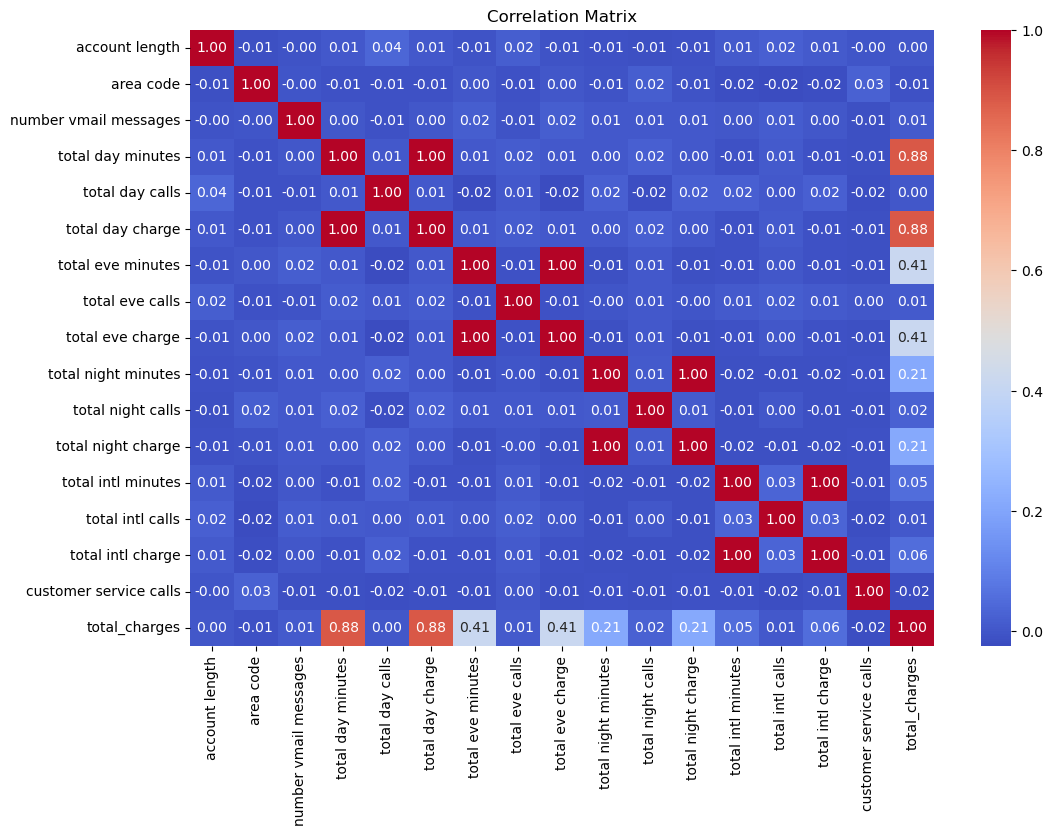

In [122]:
# numeric columns
numeric_cols = churn_analysis_df2.select_dtypes(include=['number'])

# Correlation matrix
corr_matrix = numeric_cols.corr()

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix")
plt.savefig('multicollinearity.png',dpi = 300, bbox_inches = 'tight')
plt.show()

In [123]:
FileLink('images/multicollinearity.png')

C:\Users\hp\Documents\PHASE3\PHASE3PROJECT\images\multicollinearity.png

In [124]:
# Calculate VIF for each feature
X = numeric_cols # Drop target variable
vif_data = pd.DataFrame()
vif_data["Feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

# Display VIF results
print(vif_data)

                   Feature           VIF
0           account length  7.293103e+00
1                area code  6.102501e+01
2    number vmail messages  1.351056e+00
3        total day minutes  1.246034e+08
4          total day calls  2.361747e+01
5         total day charge           inf
6        total eve minutes  3.741752e+07
7          total eve calls  2.375305e+01
8         total eve charge           inf
9      total night minutes  1.071952e+07
10       total night calls  2.460108e+01
11      total night charge           inf
12      total intl minutes  9.975354e+05
13        total intl calls  4.273501e+00
14       total intl charge           inf
15  customer service calls  2.402765e+00
16           total_charges           inf


C:\Users\hp\anaconda3\Lib\site-packages\statsmodels\stats\outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


#### I calculate the Variance Inflation Factor (VIF) for each feature. A VIF above 10 typically signals high multicollinearity, suggesting the need to simplify the feature set by removing or combining related features.

**Insight**
 * total day charge, total eve charge, total night charge, total intl charge, and total day minutes indicate high multicollinearity.
 * Drop total day charge, total eve charge, total night charge, and total intl charge because they are directly derived from the "minutes" .The more minutes someone has the more charge they incur.

 # **5.Modeling**

## In this section, I developed models to predict customer churn, focusing on creating reliable predictions and actionable insights. I started with a baseline model to establish a baseline and then tuned a more advanced version to improve performance.

In [125]:
churn_analysis_modeling = churn_analysis_df.copy()
churn_analysis_modeling


,state,account length,area code,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,AZ,192,415,no,yes,36,156.2,77,26.55,215.5,126,18.32,279.1,83,12.56,9.9,6,2.67,2,False
3329,WV,68,415,no,no,0,231.1,57,39.29,153.4,55,13.04,191.3,123,8.61,9.6,4,2.59,3,False
3330,RI,28,510,no,no,0,180.8,109,30.74,288.8,58,24.55,191.9,91,8.64,14.1,6,3.81,2,False
3331,CT,184,510,yes,no,0,213.8,105,36.35,159.6,84,13.57,139.2,137,6.26,5.0,10,1.35,2,False


### Multicollinearity Check

In [126]:
# Dropping the 'charge' and 'area code'columns to address multicollinearity
churn_analysis_modeling = churn_analysis_modeling .drop(columns=['total day charge', 'total eve charge', 'total night charge', 'total intl charge', 'area code'])

In [127]:
# Identify categorical and numerical columns
categorical_columns = list(churn_analysis_modeling.select_dtypes(include=['object']).columns)
numerical_columns = list(churn_analysis_modeling.select_dtypes(include=['int64', 'float64']).columns)

# Display the categorical and numerical variables
numerical_columns, categorical_columns



(['account length',
  'number vmail messages',
  'total day minutes',
  'total day calls',
  'total eve minutes',
  'total eve calls',
  'total night minutes',
  'total night calls',
  'total intl minutes',
  'total intl calls',
  'customer service calls'],
 ['state', 'international plan', 'voice mail plan'])


### **Identify Categorical and Numerical Columns**

### One_Hot Encoding

#### One-hot encoding is a way to turn categories into numbers so that machine learning models can understand them. It creates separate columns for each category, using 1 to show that a category is present and 0 if it’s not.

In [60]:
#  one-hot encoding to categorical variables
churn_encoded = pd.get_dummies(churn_analysis_modeling, columns=categorical_columns, drop_first=True)

# Display the first few rows of the newly encoded dataframe
churn_encoded.head()

,account length,number vmail messages,total day minutes,total day calls,total eve minutes,total eve calls,total night minutes,total night calls,total intl minutes,total intl calls,...,state_TX,state_UT,state_VA,state_VT,state_WA,state_WI,state_WV,state_WY,international plan_yes,voice mail plan_yes
0,128,25,265.1,110,197.4,99,244.7,91,10.0,3,...,False,False,False,False,False,False,False,False,False,True
1,107,26,161.6,123,195.5,103,254.4,103,13.7,3,...,False,False,False,False,False,False,False,False,False,True
2,137,0,243.4,114,121.2,110,162.6,104,12.2,5,...,False,False,False,False,False,False,False,False,False,False
3,84,0,299.4,71,61.9,88,196.9,89,6.6,7,...,False,False,False,False,False,False,False,False,True,False
4,75,0,166.7,113,148.3,122,186.9,121,10.1,3,...,False,False,False,False,False,False,False,False,True,False


In [129]:
churn_encoded=churn_encoded.astype(int)

In [130]:
churn_encoded['churn']=churn_encoded['churn'].astype(int)

### Splitting the dataset into X and y

In [131]:
# Target variable from the encoded DataFrame
y = churn_encoded['churn']

# Predictor variables from the encoded DataFrame
X = churn_encoded.drop(columns=['churn'])
# Checking class imbalance
churn_encoded['churn'].value_counts()

churn
0    2850
1     483
Name: count, dtype: int64

### To handle class imbalance, we'll use SMOTE. 

In [132]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Initialize the scaler
scaler = StandardScaler()

# Fit the scaler to the training data and transform the training data
X_train_scaled = scaler.fit_transform(X_train)

#Transform the test data using the same scaler
X_test_scaled = scaler.transform(X_test)

# SMOTE to oversample the minority class (churn = 1)
smote = SMOTE(sampling_strategy= 'auto', random_state=42)  # 50% of the majority class
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_scaled, y_train)

# Check the class distribution after resampling
print("Class distribution after resampling:", y_train_resampled.value_counts())

Class distribution after resampling: churn
0    2284
1    2284
Name: count, dtype: int64


**Baseline Model (Logistic Regression)**

Baseline Model Accuracy: 0.7841079460269865
Baseline Model Recall: 0.7425742574257426
Baseline Model Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.79      0.86       566
           1       0.39      0.74      0.51       101

    accuracy                           0.78       667
   macro avg       0.67      0.77      0.69       667
weighted avg       0.86      0.78      0.81       667



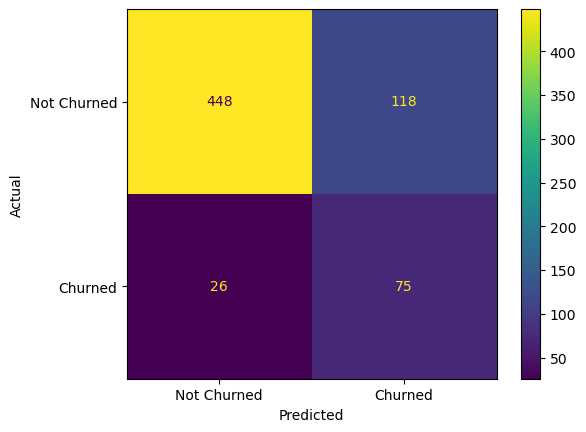

In [133]:

# Initialize the logistic regression model
logreg = LogisticRegression(random_state= 555)

# Train the model
baseline_model = logreg.fit(X_train_resampled, y_train_resampled)

# Make predictions
y_pred_baseline = baseline_model.predict(X_test_scaled)


# Visualizing the confusion matrix
cm_display = ConfusionMatrixDisplay.from_estimator(estimator=logreg, X=X_test_scaled, y=y_test, display_labels=["Not Churned", "Churned"])
cm_display.ax_.set_xlabel('Predicted')
cm_display.ax_.set_ylabel('Actual')


# Evaluate the model
print("Baseline Model Accuracy:", accuracy_score(y_test, y_pred_baseline))
print("Baseline Model Recall:", recall_score(y_test, y_pred_baseline))
print("Baseline Model Classification Report:\n", classification_report(y_test, y_pred_baseline))

**INSIGHT**

* Confusion Matrix Analysis: The confusion matrix shows that the model predicted 448 true negatives and 75 true positives, demonstrating its strength in identifying non-churning customers. However, the 118 false positives and 26 false negatives highlight the trade-off between precision and recall.
  
* For the "No Churn" class (False): The model exhibits a solid precision of 0.95, indicating a high likelihood that non-churning predictions are correct. However, the recall of 0.79 suggests room for improvement in identifying all non-churning customers.
* 
For the "Churn" class (True): The precision o0.3829 indicates that when the model predicts churn, it is correct approximately one-third of the time. The recall  0.7465, while moderately high, points towards the potential to capture more churn cases.

**FEATURE IMPORTANCE**

In [134]:
# X_train columns
feature_names = X_train.columns  

#X_train_resampled to a DataFrame since its an array
X_train_resampled_df = pd.DataFrame(X_train_resampled, columns=feature_names)

# best coefficients
coefficients = baseline_model.coef_[0]
feature_importance = pd.DataFrame({
    'Feature': X_train_resampled_df.columns,
    'Importance': coefficients
}).sort_values(by='Importance', ascending=False)

print(feature_importance)

                   Feature  Importance
10  customer service calls    0.955351
61  international plan_yes    0.858997
2        total day minutes    0.809393
1    number vmail messages    0.408006
4        total eve minutes    0.391188
..                     ...         ...
9         total intl calls   -0.312642
38                state_ND   -0.325211
49                state_RI   -0.325739
11                state_AL   -0.327777
62     voice mail plan_yes   -0.927425

[63 rows x 2 columns]


**INSIGHT**

**Customer Service Calls:** Customers making frequent service calls have the highest positive impact on churn, indicating dissatisfaction or unresolved issues.

**International Plan (Yes):** Customers with an international plan are more likely to churn, possibly due to dissatisfaction with international service pricing or usage limits.

**Total Day Minutes:** High:usage during the day correlates with increased churn, potentially linked to overcharges or billing concerns.

**Second Model**

**Decision Trees**

Decision Tree Accuracy: 0.8785607196401799
Decision Tree Recall: 0.7524752475247525
Decision Tree Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.90      0.93       566
           1       0.58      0.75      0.65       101

    accuracy                           0.88       667
   macro avg       0.76      0.83      0.79       667
weighted avg       0.90      0.88      0.88       667



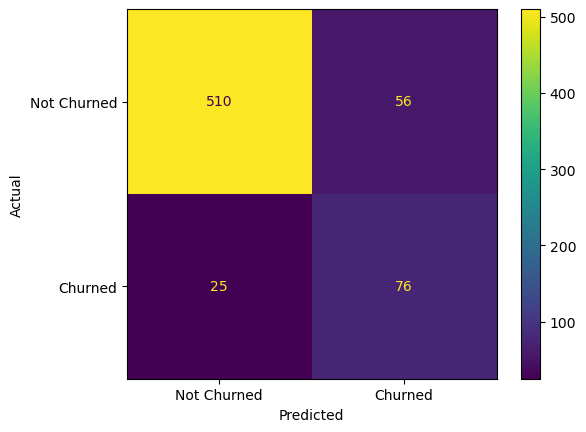

In [135]:

# Initialize and train the decision train
d_model = DecisionTreeClassifier(random_state=555)
d_model.fit(X_train_resampled, y_train_resampled)

# Make predictions
y_pred_tree = d_model.predict(X_test_scaled)


# Visualizing the confusion matrix
cm_display = ConfusionMatrixDisplay.from_estimator(estimator=d_model, X=X_test_scaled, y=y_test, display_labels=["Not Churned", "Churned"])
cm_display.ax_.set_xlabel('Predicted')
cm_display.ax_.set_ylabel('Actual')


# Evaluate the model
print("Decision Tree Accuracy:", accuracy_score(y_test, y_pred_tree))
print("Decision Tree Recall:", recall_score(y_test, y_pred_tree))
print("Decision Tree Classification Report:\n", classification_report(y_test, y_pred_tree))

**Insight**

Accuracy: The decision tree model is more accurate overall, improving from 78.4% to 87.9%.

Recall: Both models have good recall for churn, but the decision tree performs slightly better, with 75.2% versus the baseline's 74.3%.


Precision: The decision tree's precision is higher, making it more reliable in correctly predicting who will churn.

**Model Tuning for Decision Trees**

In [136]:
# Instantiate DecisionTree
model = DecisionTreeClassifier(random_state=42)

# Set hyperparameter grid for tuning
param_grid = {
    'max_depth': [5, 10, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 5]
}

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='roc_auc')

# Fit the grid search to the training data
grid_search.fit(X_train_resampled, y_train_resampled)

#  best hyperparameters found
print(f"Best hyperparameters: {grid_search.best_params_}")

# Use the best hyperparameters from grid search
best_model = grid_search.best_estimator_

# Train the model with the optimal parameters
best_model.fit(X_train_resampled, y_train_resampled)

Best hyperparameters: {'max_depth': None, 'min_samples_leaf': 5, 'min_samples_split': 2}


DecisionTreeClassifier(min_samples_leaf=5, random_state=42)

              precision    recall  f1-score   support

 Not Churned       0.95      0.92      0.94       566
     Churned       0.63      0.75      0.69       101

    accuracy                           0.90       667
   macro avg       0.79      0.84      0.81       667
weighted avg       0.91      0.90      0.90       667

ROC-AUC: 0.8803047265857327
Confusion Matrix:
[[522  44]
 [ 25  76]]


Text(0, 0.5, 'Actual')

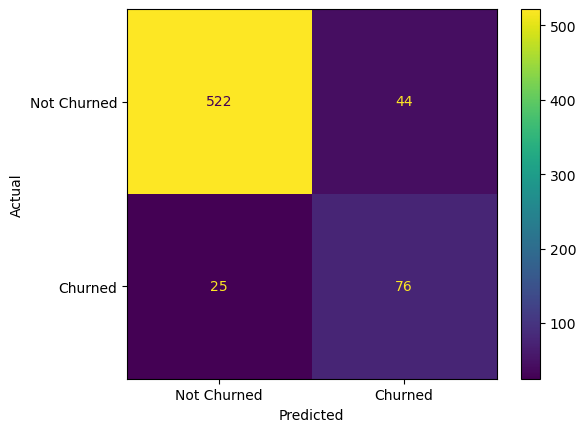

In [137]:
# Predictions on the test data
y_pred = best_model.predict(X_test_scaled)

# Print classification report
print(classification_report(y_test, y_pred, target_names=["Not Churned", "Churned"]))

# Calculate AUC-ROC score
roc_auc = roc_auc_score(y_test, best_model.predict_proba(X_test_scaled)[:, 1])
print(f"ROC-AUC: {roc_auc}")

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

# Visualizing the confusion matrix
cm_display = ConfusionMatrixDisplay.from_estimator(estimator=best_model, X=X_test_scaled, y=y_test, display_labels=["Not Churned", "Churned"])
cm_display.ax_.set_xlabel('Predicted')
cm_display.ax_.set_ylabel('Actual')

**INSIGHT**

The tuned Decision Tree model shows an improvement in accuracy (0.90 vs. 0.88) and precision (0.63 vs. 0.58) compared to the baseline model. Recall remains the same (0.75), which is crucial for correctly identifying churned customers. The F1-score also improves (0.69 vs. 0.65), indicating better balance between precision and recall. The ROC-AUC of 0.88 highlights the model's ability to distinguish between churned and non-churned customers. Overall, the tuned model is more effective in targeting churned customers with better precision while maintaining strong recall.

**Feature Importance**

In [138]:
feature_importance = pd.DataFrame({
    'Feature': X_train_resampled_df.columns,
    'Importance': best_model.feature_importances_
}).sort_values(by='Importance', ascending=False)

print(feature_importance)

                   Feature  Importance
2        total day minutes    0.235063
10  customer service calls    0.206697
61  international plan_yes    0.192274
62     voice mail plan_yes    0.094040
4        total eve minutes    0.068545
..                     ...         ...
34                state_MO    0.000000
46                state_OK    0.000000
44                state_NY    0.000000
43                state_NV    0.000000
11                state_AL    0.000000

[63 rows x 2 columns]


High Importance: Features like **total day minutes, customer service calls, and international plan_yes** have the highest importance, meaning they are key drivers in predicting churn.


Low Importance: Features such as **total evening minutes** are less influential in determining churn.

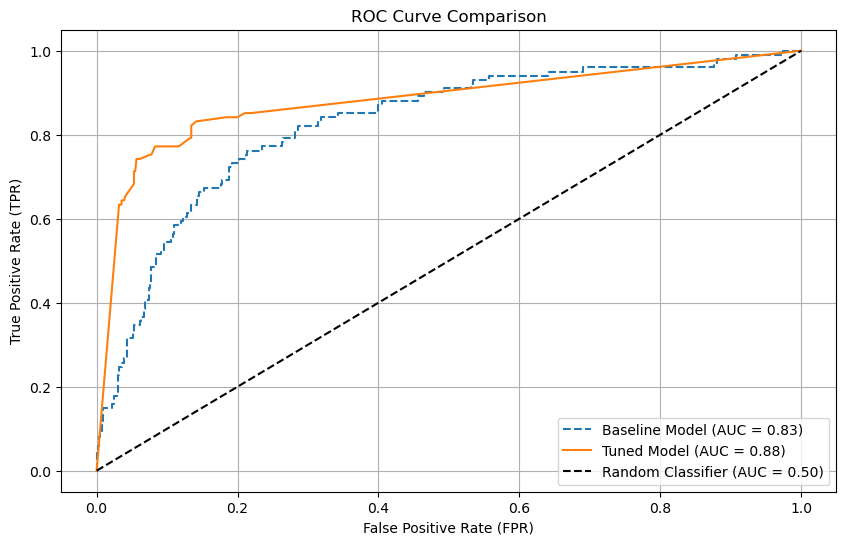

In [139]:
# Get the predicted probabilities for both models
baseline_probs = baseline_model.predict_proba(X_test_scaled)[:, 1]  
tuned_probs = best_model.predict_proba(X_test_scaled)[:, 1]  
#  ROC curves
baseline_fpr, baseline_tpr, _ = roc_curve(y_test, baseline_probs)
tuned_fpr, tuned_tpr, _ = roc_curve(y_test, tuned_probs)

#  AUC scores
baseline_auc = roc_auc_score(y_test, baseline_probs)
tuned_auc = roc_auc_score(y_test, tuned_probs)

# Plot ROC curves
plt.figure(figsize=(10, 6))
plt.plot(baseline_fpr, baseline_tpr, label=f'Baseline Model (AUC = {baseline_auc:.2f})', linestyle='--')
plt.plot(tuned_fpr, tuned_tpr, label=f'Tuned Model (AUC = {tuned_auc:.2f})', linestyle='-')
plt.plot([0, 1], [0, 1], 'k--', label='Random Classifier (AUC = 0.50)')
plt.savefig('ROC-CURVE.png', dpi = 300, bbox_inches = 'tight')
# labels, legend, and title
plt.title('ROC Curve Comparison')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.legend()
plt.grid()
plt.show()

In [140]:
FileLink('images/ROC-CURVE.png')

C:\Users\hp\Documents\PHASE3\PHASE3PROJECT\images\ROC-CURVE.png

**CONCLUSIONS**

* Charges  are directly derived from the "minutes" .The more minutes someone has the more charge they incur. This makes them have a linear dependency.

* Key features like total day minutes, customer service calls, and international plan_yes have the highest importance, meaning they are key drivers in predicting churn.

* Customers who have opted for the International Plan are observed to have a higher likelihood of churning compared to those who haven't chosen this plan.

* Customers who make  more customer service calls exhibit a significantly higher churn rate.

* Some areas have a higher churn rate due to charges incurred.
  
* The tuned Decision Tree model has a higher ROC-AUC score (0.88) than the baseline model (0.83), demonstrating that it better distinguishes between churned and non-churned customers.



**RECOMMENDATIONS**


* Focus on customers with high charges due to long call durations (high "total day minutes"). These customers are more likely to churn, so offering discounts or personalized plans could help keep them satisfied.

* Since customers who make more customer service calls are more likely to churn, it would be necessary to improve the customer service experience. 

*  Customers who opt for the International Plan have a higher likelihood of churning.Analyzing why these customers are dissatisfied would reduce the churn rate.
  
*  Use the insights from the model to proactively reach out to customers who are likely to churn, especially those with high service usage or international plans. Offering them discounted deals and loyalty programs will reduce churn.

* Certain regions show higher churn rates, you may want to investigate the local service quality or charge-related factors. Offering localized promotions or improving network coverage in those areas could help reduce churn.

* Customers may churn due to unexpected or high charges. Offering more transparency about how charges are calculated  could help build trust and reduce churn.

**NEXT STEPS**

* Experiment with different machine learning models (e.g., Random Forest, Gradient Boosting) to potentially improve churn prediction accuracy.
* Use churned customer feedback to improve customer support processes, such as faster response times or improved issue resolution.
* Collect more information of the customers.